# Weather Data - Data Cleaning and Preprocessing
## Data Science - CS 334
---------------------------------------------------------

### Dataset
- The weather dataset is a messy, real-world dataset containing an entire year’s worth of weather data from Boston, USA. 
- This dataframe has a lot of problems regarding the quality of the data. 
- The goal for this part of the assignment is to clean the data so it can be later used for insightful analysis.

### Importing Libraries
-----------------------------

In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#Loading data
df = pd.read_csv('weather_start.csv')
print(df.shape)
df.head(366)

(366, 23)


,CloudCover,Events,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Humidity,Mean.Sea.Level.PressureIn,Mean.TemperatureF,Mean.VisibilityMiles,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees,Date
0,'6','Rain','46','29','74','30.45','64','10','22','63','30.13','52','10','13','40','26','52','30.01','39','10','0.01','268',Year: 2014 Month: 12 Day: 1
1,'7','Rain-Snow','40','29','92','30.71','42','10','24','72','30.59','38','8','15','27','17','51','30.4','33','2','0.10','62',Year: 2014 Month: 12 Day: 2
2,'8','Rain','49','38','100','30.4','51','10','29','79','30.07','44','5','12','42','24','57','29.87','37','1','0.44','254',Year: 2014 Month: 12 Day: 3
3,'3',NaN,'24','33','69','30.56','43','10','25','54','30.33','37','10','12','21','13','39','30.09','30','10','0.00','292',Year: 2014 Month: 12 Day: 4
4,'5','Rain','37','26','85','30.68','42','10','22','66','30.59','34','10','10','25','12','47','30.45','26','5','0.11','61',Year: 2014 Month: 12 Day: 5
5,'8','Rain','45','25','100','30.42','45','10','22','93','30.24','42','4','8','40','36','85','30.16','38','0','1.09','313',Year: 2014 Month: 12 Day: 6
6,'6','Rain','36','32','92','30.69','38','10','25','61','30.46','30','10','15','20','-3','29','30.24','21','5','0.13','350',Year: 2014 Month: 12 Day: 7
7,'8','Snow','28','28','92','30.77','29','10','21','70','30.67','24','8','13','16','3','47','30.51','18','2','0.03','354',Year: 2014 Month: 12 Day: 8
8,'8','Rain','49','52','100','30.51','49','10','38','93','30.04','39','2','20','41','28','86','29.49','29','1','2.90','38',Year: 2014 Month: 12 Day: 9
9,'8','Rain','45','29','100','29.58','48','10','23','95','29.5','43','3','13','39','37','89','29.43','38','1','0.28','357',Year: 2014 Month: 12 Day: 10


<div style="color: pink; 
            background-color: #b73239;
            border-radius: 5px;
            padding: 5px 5px 5px 5px;
            display: inline-block">
    If you get a `SettingWithCopyWarning:` when using pandas, you can almost always ignore it. 
</div>

## Cleaning Part I: Data Formats and Types

--------------------------------------------------

- We can see the `Date` column has the information in a weird text-based style. So the first order of business is to parse the `Date` column and obtain separate year, month and day columns as integer values.You will use regex for this.Then you will combine these three columns using `pd.to_datetime` to create a datetime column which is a special type in pandas. It gives you some amazing funcitonality.
- Then you have individual weather related measurements (`Max.TemperatureF`, `Max.Dew.PointF` etc) but the values of these columns have quotes around them ('') so these need to be cleaned.
- For the weather related columns you need to fix the types. Pandas documentation is your friend so use it!
- You should also keep an eye out for inconsistent encodings.  Everything is a string, that means encoding issues can be present. These are more common in categorical variables like a column describing gender has both full words (female, male) and letters (f, m). You will need to properly standardise this issue.
- Everything is a string. This is a sign of a long day (maybe not?) of data cleaning ahead. Good Luck!

## Distributions + Removing outliers + Imputing missing values

-----------------------------------------------------------------

- Now, you can start the process of data cleaning and exploration as these two things go hand-in-hand. Look for missing values and outliers. You can use different methods to find these problem points using visual methods like plots or analytical methods like summary statistics. 
- Look at what plots can be used to find outliers. Which columns have outliers? What are those values? What did you to process them?
- Which columns have missing values? Find all the columns of possible missing values and impute them using the correct method.
- Check for positive and negative values for all columns. Is there any value which is not allowed to be in a column? What can be done to correct these?

Your dataset should look like `weather_clean.pkl` file at the end. Use it as a refrence.

# Cleaning quotes 

In [3]:
# Replacing 'T' values in PrecipitationIn column to '0.00'

df['PrecipitationIn'] = df['PrecipitationIn'].str.replace('T','0.00') # Just changing all T's to some random value will fix later

# Using regular expressions to remove single quotes around data

df = df.replace({'\'':''}, regex=True)

# Now using median of columns to replace values that were initially 'T' in 'PrecipitationIn' column

"""
It should be noted that 'T' means trace precipitation and it means the precipitation that could not be recorded by
rain guage and is usually considered less than 0.01 and hence we can replace those with 0.00. Or with median values
of the column that again turned out to be 0.00 (conincidence maybe!)

"""

df['PrecipitationIn'] = df['PrecipitationIn'].replace(to_replace = 0.00 , value = df['PrecipitationIn'].median())

# Parsing the date column

Step 1 : Use regular expression to split at ' ' 
Step 2 : Year, Month, and Day stored at indexes 0, 2, and 4 now so extract from there and make 3 columns for each in data frame.
Step 3 : Use pd.to_datetime to combine these 3 columns and assign the Date column the parsed values

In [4]:
date_pieces = (df['Date']
               .str.split(r' ').str[1:6]
              )
                   
df['Year'] = date_pieces.str[0].astype(int)
df['Month'] = date_pieces.str[2].astype(int)
df['Day'] = date_pieces.str[4].astype(int)

df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Dropping the Year, Month, and Day columns

In [5]:
del df['Year']
del df['Month']
del df['Day']

# Cleaning the events column type from object to category

In [6]:
# Replacing NaN with None
df['Events'] = df['Events'].replace(to_replace = np.nan , value = 'None')

# Changing type of 'Events' from object to category
for column in ['Events']:
    df[column] = df[column].astype('category')

# Cleaning remaining columns from object to type float

In [7]:
# Events and Date columns already been worked with
exclude = ['Events' , 'Date']

# Changing type from object to float
for col in df.columns:
    if col in exclude:
        continue
    else:
        df[col] = df[col].astype(float)

# Printing cleaned data frame

In [8]:
df.head(13)

,CloudCover,Events,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Humidity,Mean.Sea.Level.PressureIn,Mean.TemperatureF,Mean.VisibilityMiles,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees,Date
0,6.0,Rain,46.0,29.0,74.0,30.45,64.0,10.0,22.0,63.0,30.13,52.0,10.0,13.0,40.0,26.0,52.0,30.01,39.0,10.0,0.01,268.0,2014-12-01
1,7.0,Rain-Snow,40.0,29.0,92.0,30.71,42.0,10.0,24.0,72.0,30.59,38.0,8.0,15.0,27.0,17.0,51.0,30.40,33.0,2.0,0.10,62.0,2014-12-02
2,8.0,Rain,49.0,38.0,100.0,30.40,51.0,10.0,29.0,79.0,30.07,44.0,5.0,12.0,42.0,24.0,57.0,29.87,37.0,1.0,0.44,254.0,2014-12-03
3,3.0,None,24.0,33.0,69.0,30.56,43.0,10.0,25.0,54.0,30.33,37.0,10.0,12.0,21.0,13.0,39.0,30.09,30.0,10.0,0.00,292.0,2014-12-04
4,5.0,Rain,37.0,26.0,85.0,30.68,42.0,10.0,22.0,66.0,30.59,34.0,10.0,10.0,25.0,12.0,47.0,30.45,26.0,5.0,0.11,61.0,2014-12-05
5,8.0,Rain,45.0,25.0,100.0,30.42,45.0,10.0,22.0,93.0,30.24,42.0,4.0,8.0,40.0,36.0,85.0,30.16,38.0,0.0,1.09,313.0,2014-12-06
6,6.0,Rain,36.0,32.0,92.0,30.69,38.0,10.0,25.0,61.0,30.46,30.0,10.0,15.0,20.0,-3.0,29.0,30.24,21.0,5.0,0.13,350.0,2014-12-07
7,8.0,Snow,28.0,28.0,92.0,30.77,29.0,10.0,21.0,70.0,30.67,24.0,8.0,13.0,16.0,3.0,47.0,30.51,18.0,2.0,0.03,354.0,2014-12-08
8,8.0,Rain,49.0,52.0,100.0,30.51,49.0,10.0,38.0,93.0,30.04,39.0,2.0,20.0,41.0,28.0,86.0,29.49,29.0,1.0,2.90,38.0,2014-12-09
9,8.0,Rain,45.0,29.0,100.0,29.58,48.0,10.0,23.0,95.0,29.50,43.0,3.0,13.0,39.0,37.0,89.0,29.43,38.0,1.0,0.28,357.0,2014-12-10


# Finding missing values in data frame

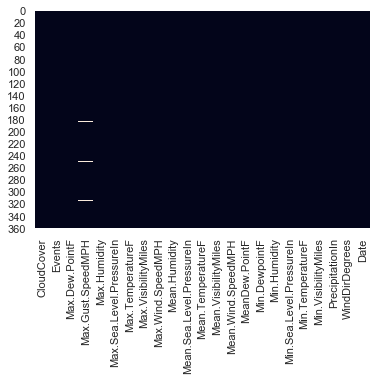

In [9]:
sns.heatmap(df.isnull(), cbar=False)
# It can be seen clearly from the heatmap below that column 'Max.Gust.SpeedMPH' contains missing values

# It should be noted that column 'Events' also had missing values i.e NaN but I had already catered to it by replacing
# it with None

# Detecting how many values are missing

In [10]:
df.info()

# Hence column 'Max.Gust.SpeedMPH' has 6 missing values since shape of our data fram shows it has 366 records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 23 columns):
CloudCover                   366 non-null float64
Events                       366 non-null category
Max.Dew.PointF               366 non-null float64
Max.Gust.SpeedMPH            360 non-null float64
Max.Humidity                 366 non-null float64
Max.Sea.Level.PressureIn     366 non-null float64
Max.TemperatureF             366 non-null float64
Max.VisibilityMiles          366 non-null float64
Max.Wind.SpeedMPH            366 non-null float64
Mean.Humidity                366 non-null float64
Mean.Sea.Level.PressureIn    366 non-null float64
Mean.TemperatureF            366 non-null float64
Mean.VisibilityMiles         366 non-null float64
Mean.Wind.SpeedMPH           366 non-null float64
MeanDew.PointF               366 non-null float64
Min.DewpointF                366 non-null float64
Min.Humidity                 366 non-null float64
Min.Sea.Level.PressureIn     366 non-null fl

# Imputing missing values now

In [11]:
"""
I will use the median of the column for imputing missing values since column 'Max.Gust.SpeedMPH' has great outliers
hence median is preferable since mean of values would be greatly affected by large outliers.

"""

df['Max.Gust.SpeedMPH'].fillna(df['Max.Gust.SpeedMPH'].median() , inplace = True)

# Visualising missing values again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 23 columns):
CloudCover                   366 non-null float64
Events                       366 non-null category
Max.Dew.PointF               366 non-null float64
Max.Gust.SpeedMPH            366 non-null float64
Max.Humidity                 366 non-null float64
Max.Sea.Level.PressureIn     366 non-null float64
Max.TemperatureF             366 non-null float64
Max.VisibilityMiles          366 non-null float64
Max.Wind.SpeedMPH            366 non-null float64
Mean.Humidity                366 non-null float64
Mean.Sea.Level.PressureIn    366 non-null float64
Mean.TemperatureF            366 non-null float64
Mean.VisibilityMiles         366 non-null float64
Mean.Wind.SpeedMPH           366 non-null float64
MeanDew.PointF               366 non-null float64
Min.DewpointF                366 non-null float64
Min.Humidity                 366 non-null float64
Min.Sea.Level.PressureIn     366 non-null fl

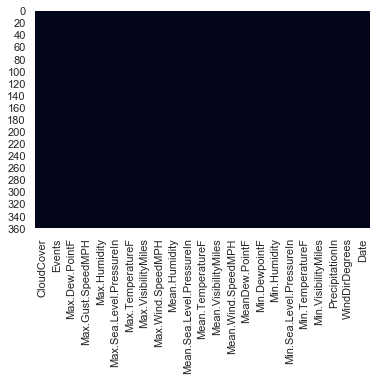

In [12]:
sns.heatmap(df.isnull() , cbar = False)
df.info()

# Hence missing values has been imputed successfully as seen by the heatmap and dataframe info.

# Finding columns having outliers

In [13]:
exclude = ['Events' , 'Date'] # Since these are of type category and date_time
outliers = [] # stores column names that have outliers
df_list_outliers = [] # stores data frames along with rows that contain ONLY the outliers

for col in df.columns:
    if col in exclude:
        continue
    else:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5*IQR)
        upper_bound = Q3 + (1.5*IQR)
        temp = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_column = temp[col]
        tup = temp.shape
        if tup[0] != 0:
            outliers.append(col)
            df_list_outliers.append(outlier_column)
   
# Hence columns that have outliers have been extracted using IQR rule for outliers

# This command can be used to print names of columns that have outliers
#outliers

# The next two commands can be used for printing the col name that has outliers along with indexes where they occur and 
# their values

#print (outliers[0])
df_list_outliers[1]

108      39.0
121      40.0
135      39.0
141    1000.0
Name: Max.Humidity, dtype: float64

# Visualising patterns in outlier occurences using scatter plots

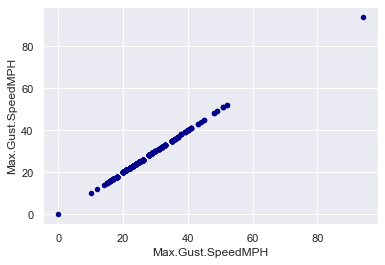

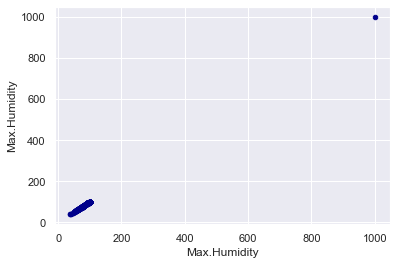

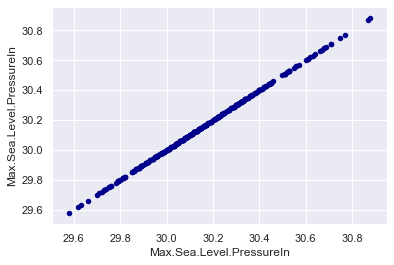

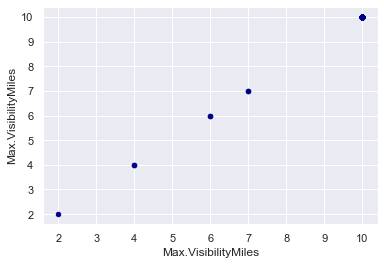

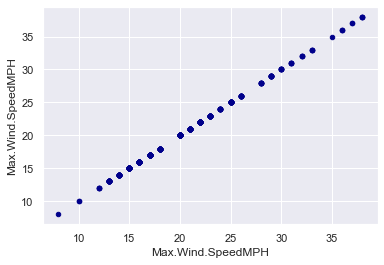

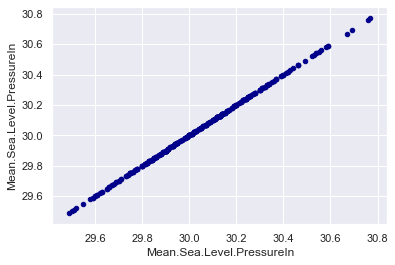

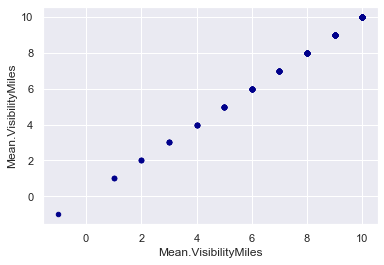

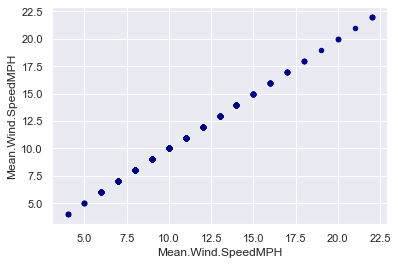

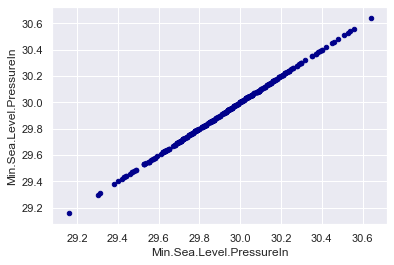

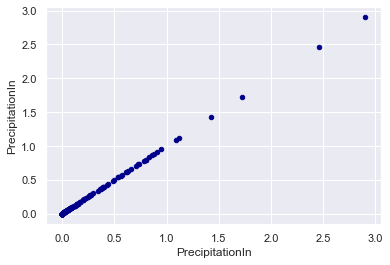

In [14]:
for col in outliers:
    ax1 = df.plot.scatter(x = col,
                          y = col,
                          c = 'DarkBlue')

# Explanation for outliers adjustments

There are some columns which has outliers that can be due to fluctuations due to certain conditions. While other columns
have outliers that are not justified since they cannot be explained by any patterns in other columns. For instance
'Max.Gust.SpeedMPH' has 3 outliers. A quick search through the data frame showed that events at this particular date were 
snowy and rainy but other columns had values in normal ranges. And a further quick search through other records revealed even when there were rains and snow, wind gusts never rose to this high values. Hence these outlier values could have been mistakenly written and needs to be adjusted as they can prove problematic during data analysis.

Similarly, columns such as Mean.VisibilityMiles can have fluctuations since visibility can be affected by rains or snow
and it has no hard and fast rule that it would be the same or within certain range everytime. Hence I would keep
such outliers in the data.

Finally I will use the median of columns to replace outliers that should not be there according to above provided
reasoning


# Adjusting outliers

In [15]:
index1 = df_list_outliers[0]

for data in index1:
    df['Max.Gust.SpeedMPH'] = df['Max.Gust.SpeedMPH'].replace(to_replace = data , value = df['Max.Gust.SpeedMPH'].median())
        
df['Max.Humidity'] = df['Max.Humidity'].replace(to_replace = 1000.0 , value = df['Max.Humidity'].median())  

# Scatter plots after adjusting outliers

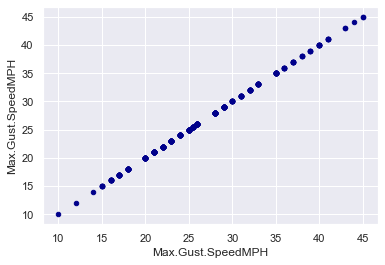

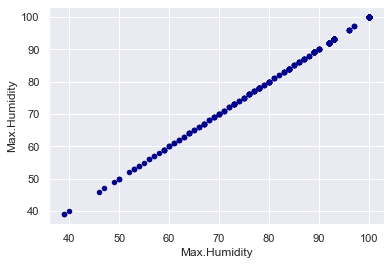

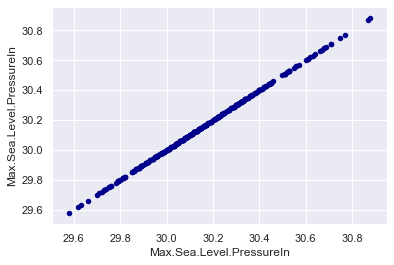

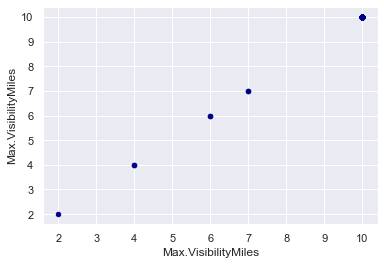

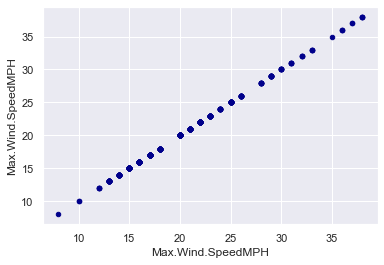

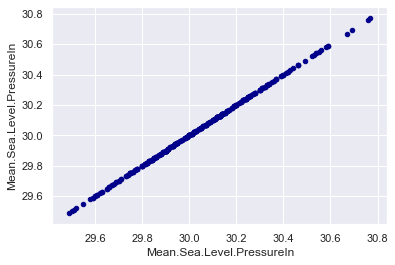

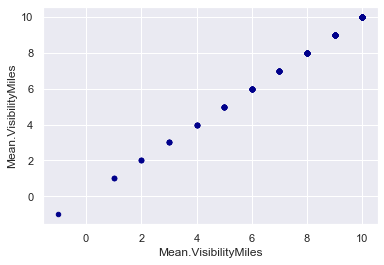

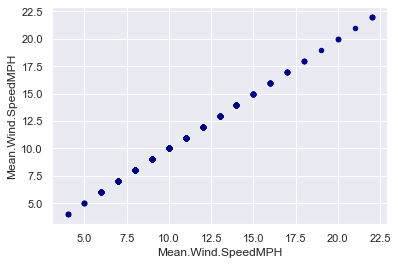

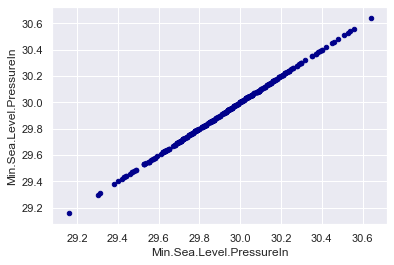

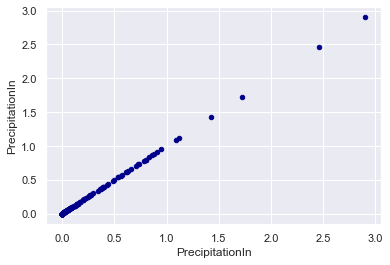

In [16]:
for col in outliers:
    ax1 = df.plot.scatter(x = col,
                          y = col,
                          c = 'DarkBlue')

# Checking for positive and negative values for all columns

In [17]:
# for cloud cover it cannot be less than 1 or greater than 8 (9 in some case according to wikipedia)
i = False
for value in df['CloudCover']:
    if value < 0 or value > 9:
        i = True
if i == True:
    print('Unacceptable values found in CloudCover')
else:
    print('CloudCover has acceptable values')
        
# Hence 'CloudCover' contains all acceptable values within proper range of 1 to 8 or 9 inclusive

# We skip 'Events' and 'Date' columns since they are non-numerical columns

# This is the list of all those columns that can have both positive and negative values so we wont check for them
can_be_neg = ['Max.TemperatureF', 'Mean.TemperatureF', 'Min.TemperatureF', 'PrecipitationIn', 'WindDirDegrees', 
             'Max.Dew.PointF', 'MeanDew.PointF, Min.DewpointF']

# List of columns that should not have negative values so we will iterate over them to find if any
cannot_be = ['Max.Gust.SpeedMPH', 'Max.Humidity', 'Max.Sea.Level.PressureIn', 'Max.VisibilityMiles', 'Max.Wind.SpeedMPH', 
            'Mean.Humidity', 'Mean.Sea.Level.PressureIn', 'Mean.VisibilityMiles', 'Mean.Wind.SpeedMPH', 'Min.Humidity', 
            'Min.Sea.Level.PressureIn', 'Min.VisibilityMiles']

j = False
for col in cannot_be:
    for data in df[col]:
        if data < 0:
            j = True
            break
        else:
            continue
    if j == True:
        print ("Negative values found in column :  " + col)
    else:
        print ("No negative values found in column :  " + col)
    j = False
    
for i in df['Mean.VisibilityMiles']:
    if i < 0:
        print('Negative value in Mean.VisibilityMiles is : ', i)

# Hence it can be seen that 'Mean.VisibilityMiles' has one negative value of -1.0. This could be due to
# different factors such as incorrectly written or written by mistake so we need to replace with
# the average values of column. This column cannot have negative values since visibility in Miles cannot be negative.


CloudCover has acceptable values
No negative values found in column :  Max.Gust.SpeedMPH
No negative values found in column :  Max.Humidity
No negative values found in column :  Max.Sea.Level.PressureIn
No negative values found in column :  Max.VisibilityMiles
No negative values found in column :  Max.Wind.SpeedMPH
No negative values found in column :  Mean.Humidity
No negative values found in column :  Mean.Sea.Level.PressureIn
Negative values found in column :  Mean.VisibilityMiles
No negative values found in column :  Mean.Wind.SpeedMPH
No negative values found in column :  Min.Humidity
No negative values found in column :  Min.Sea.Level.PressureIn
No negative values found in column :  Min.VisibilityMiles
Negative value in Mean.VisibilityMiles is :  -1.0


# Correcting negative values

In [18]:
df['Mean.VisibilityMiles'] = df['Mean.VisibilityMiles'].replace(to_replace = -1.0 , value = df['Mean.VisibilityMiles'].mean())

# Negative values in unwanted locations has been catered to now

# Saving as a pickle for analysis

In [22]:
df.to_pickle('weather_clean.pkl')
cleaned = pd.read_pickle("weather_clean.pkl")
print (cleaned.shape)
#cleaned.dtypes
cleaned.head()

(366, 23)


,CloudCover,Events,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Humidity,Mean.Sea.Level.PressureIn,Mean.TemperatureF,Mean.VisibilityMiles,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees,Date
0,6.0,Rain,46.0,29.0,74.0,30.45,64.0,10.0,22.0,63.0,30.13,52.0,10.0,13.0,40.0,26.0,52.0,30.01,39.0,10.0,0.01,268.0,2014-12-01
1,7.0,Rain-Snow,40.0,29.0,92.0,30.71,42.0,10.0,24.0,72.0,30.59,38.0,8.0,15.0,27.0,17.0,51.0,30.40,33.0,2.0,0.10,62.0,2014-12-02
2,8.0,Rain,49.0,38.0,100.0,30.40,51.0,10.0,29.0,79.0,30.07,44.0,5.0,12.0,42.0,24.0,57.0,29.87,37.0,1.0,0.44,254.0,2014-12-03
3,3.0,None,24.0,33.0,69.0,30.56,43.0,10.0,25.0,54.0,30.33,37.0,10.0,12.0,21.0,13.0,39.0,30.09,30.0,10.0,0.00,292.0,2014-12-04
4,5.0,Rain,37.0,26.0,85.0,30.68,42.0,10.0,22.0,66.0,30.59,34.0,10.0,10.0,25.0,12.0,47.0,30.45,26.0,5.0,0.11,61.0,2014-12-05
